In [97]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob

In [101]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx')
mice.head()

,Minutes,Date,Time,B6-100 Exp. 1 MRSA Deg. C Data,B6-100 Exp. 1 MRSA Cnts Data,B6-101 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Cnts Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Cnts Data,CC002-558 Exp. 1 MRSA Deg. C Data,...,CC015-392 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Cnts Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Cnts Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Cnts Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Cnts Data,CC051-496 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Cnts Data
0,1,2019-04-26,13:10:47,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2,2019-04-26,13:11:47,NaN,69.0,NaN,19.0,NaN,37.0,NaN,...,NaN,77.0,NaN,38.0,NaN,39.0,NaN,74.0,NaN,31.0
2,3,2019-04-26,13:12:47,37.54,8.0,37.82,46.0,37.50,60.0,37.79,...,39.34,64.0,38.80,42.0,38.37,67.0,38.16,39.0,38.02,19.0
3,4,2019-04-26,13:13:47,37.56,0.0,37.74,35.0,37.64,18.0,37.78,...,39.35,48.0,38.76,26.0,38.31,22.0,38.18,38.0,38.10,47.0
4,5,2019-04-26,13:14:47,37.50,0.0,37.74,62.0,37.77,13.0,37.72,...,39.36,20.0,38.59,15.0,38.25,23.0,38.16,45.0,38.14,34.0


In [91]:
#Slicing the df to only get the temperature of each mice
#We want to do this so we can create a loop

mice_temp = mice.iloc[:,3::2] 
mice_temp.head()

,B6-100 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-558 Exp. 1 MRSA Deg. C Data,CC002-559 Exp. 1 MRSA Deg. C Data,CC015-390 Exp. 1 MRSA Deg. C Data,CC015-391 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Deg. C Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37.54,37.82,37.50,37.79,38.21,38.49,38.05,39.34,38.80,38.37,38.16,38.02
3,37.56,37.74,37.64,37.78,38.15,38.49,38.05,39.35,38.76,38.31,38.18,38.10
4,37.50,37.74,37.77,37.72,38.13,38.44,38.01,39.36,38.59,38.25,38.16,38.14


x = mice["Minutes"]
y = mice_temp
for i in y:
    #masking the data (getting rid of N/A's)
    mask = y[i].notna() # will keep the true values
    x1 = x[mask]
    y1 = y[mask]
    #Plotting
    plt.plot(x1,y1[i])
    plt.xlabel("Minutes") #x label
    plt.ylabel("Temperature (Celsius)") #y label
    plt.grid()
    plt.title("Scoring")
    


#Time Delay Embedding
    Y = tde.tde(y1)
    Y=Y.T #transporting the data
    Y


FileNotFoundError: [Errno 2] No such file or directory: 'images/image_01_0000.png'

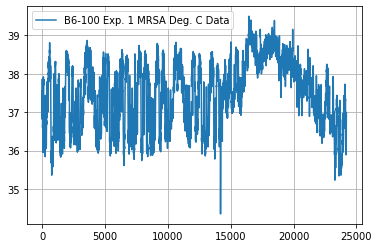

In [96]:
x = mice["Minutes"]
y = mice_temp
#list=list(y.columns)

fig,ax = plt.subplots()

for i in range (0,11):
    #masking the data (getting rid of N/A's)
    #y_col = y.iloc[:,i]
    #mask = y_col.notna()
    #mask = y.notna() # will keep the true values
    #x1 = x[mask]
    ax.cla() # clear axis
    
    y1 = y.iloc[:,i]
    df = pd.DataFrame(y1)
    #Plotting
    #plt.subplot(3, 4, i+1)
    df.plot(ax=ax)
    ax.grid(True)
    suffix = str(i).zfill(4)
    filename = "images/image_01_%s.png"%suffix
    
    fig.savefig(filename, bbox_inches="tight")
    #plt.plot(x1,y1)
    #plt.xlabel("Minutes") #x label
    #plt.ylabel("Temperature (Celsius)") #y label
    #plt.grid()
    #plt.title(str(y[i]))
    #plt.figure(i)

In [41]:
type(mice_temp)

pandas.core.frame.DataFrame

In [95]:
mice.columns.values # to verify number of columns that contain degrees

array(['Minutes', 'Date', 'Time', 'B6-100 Exp. 1 MRSA Deg. C Data',
       'B6-100 Exp. 1 MRSA Cnts Data', 'B6-101 Exp. 1 MRSA Deg. C Data',
       'B6-101 Exp. 1 MRSA Cnts Data',
       'CC002-557 Exp. 1 MRSA Deg. C Data',
       'CC002-557 Exp. 1 MRSA Cnts Data',
       'CC002-558 Exp. 1 MRSA Deg. C Data',
       'CC002-558 Exp. 1 MRSA Cnts Data',
       'CC002-559 Exp. 1 MRSA Deg. C Data',
       'CC002-559 Exp. 1 MRSA Cnts Data',
       'CC015-390 Exp. 1 MRSA Deg. C Data',
       'CC015-390 Exp. 1 MRSA Cnts Data',
       'CC015-391 Exp. 1 MRSA Deg. C Data',
       'CC015-391 Exp. 1 MRSA Cnts Data',
       'CC015-392 Exp. 1 MRSA Deg. C Data',
       'CC015-392 Exp. 1 MRSA Cnts Data',
       'CC038-582 Exp. 1 MRSA Deg. C Data',
       'CC038-582 Exp. 1 MRSA Cnts Data',
       'CC038-583 Exp. 1 MRSA Deg. C Data',
       'CC038-583 Exp. 1 MRSA Cnts Data',
       'CC051-495 Exp. 1 MRSA Deg. C Data',
       'CC051-495 Exp. 1 MRSA Cnts Data',
       'CC051-496 Exp. 1 MRSA Deg. C Data',
  